In [ ]:
from google.colab import drive
drive.mount('/content/drive')


from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_file_path = '/content/drive/MyDrive/output/splitted/test'
train_file_path =  '/content/drive/MyDrive/output/splitted/train'
val_file_path =  '/content/drive/MyDrive/output/splitted/val'

valid_split = 0.2
input_size = (244, 244)
image_color = 'rgb'
batch_size = 32
shuffle=True
train_gen=ImageDataGenerator(rescale=1/255.0,validation_split=valid_split,fill_mode='nearest',rotation_range=40,horizontal_flip=True)

validation_gen=ImageDataGenerator(rescale=1/255.0,validation_split=valid_split)

test_gen=ImageDataGenerator(rescale=1/255.0)

train_data=train_gen.flow_from_directory(directory=train_file_path,target_size=input_size,color_mode=image_color,
                                             batch_size=batch_size,shuffle=shuffle,class_mode='categorical')
test_data=test_gen.flow_from_directory(directory=test_file_path,target_size=input_size,color_mode=image_color,
                                             batch_size=batch_size,shuffle=shuffle,class_mode='categorical')
valid_data=validation_gen.flow_from_directory(directory=val_file_path,target_size=input_size,color_mode=image_color,
                                             batch_size=batch_size,shuffle=shuffle,class_mode='categorical')


Mounted at /content/drive
Found 2711 images belonging to 4 classes.
Found 981 images belonging to 4 classes.
Found 984 images belonging to 4 classes.


In [ ]:
from keras.applications import DenseNet121
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import Adam
import numpy as np

In [ ]:
# Define input shape and number of classes
input_shape = (244, 244, 3)
num_classes = 4

# Create the base pre-trained model
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=input_shape)

# Add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully-connected layer
x = Dense(1024, activation='relu')(x)

# Add a final softmax layer for classification
predictions = Dense(num_classes, activation='softmax')(x)

# Combine the base model and the top layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

29084464/29084464 [==============================] - 0s 0us/step


In [ ]:
# Compile the model with Adam optimizer and categorical cross-entropy loss
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(train_data, epochs=20, validation_data=valid_data)

Epoch 1/20
85/85 [==============================] - 789s 9s/step - loss: 0.4148 - accuracy: 0.8406 - val_loss: 0.2152 - val_accuracy: 0.9248
Epoch 2/20
85/85 [==============================] - 61s 723ms/step - loss: 0.2036 - accuracy: 0.9236 - val_loss: 0.2074 - val_accuracy: 0.9197
Epoch 3/20
85/85 [==============================] - 60s 707ms/step - loss: 0.2228 - accuracy: 0.9133 - val_loss: 0.1938 - val_accuracy: 0.9329
Epoch 4/20
85/85 [==============================] - 64s 747ms/step - loss: 0.1598 - accuracy: 0.9384 - val_loss: 0.1997 - val_accuracy: 0.9299
Epoch 5/20
85/85 [==============================] - 62s 725ms/step - loss: 0.1938 - accuracy: 0.9203 - val_loss: 0.1857 - val_accuracy: 0.9350
Epoch 6/20
85/85 [==============================] - 61s 716ms/step - loss: 0.1564 - accuracy: 0.9373 - val_loss: 0.1856 - val_accuracy: 0.9370
Epoch 7/20
85/85 [==============================] - 62s 735ms/step - loss: 0.1312 - accuracy: 0.9491 - val_loss: 0.1962 - val_accuracy: 0.9258
E

In [ ]:
model.save("/content/drive/MyDrive/densenet.h5")

In [ ]:
from tensorflow import keras
model=keras.models.load_model("/content/drive/MyDrive/densenet.h5")

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 244, 244, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 250, 250, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 122, 122, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                              

In [ ]:
op = model.predict(test_data)

31/31 [==============================] - 228s 8s/step


In [ ]:
op = model.predict(test_data)
op1 = np.argmax(op,axis=1)
len(op1),len(test_data.classes)

In [ ]:
op = model.predict(valid_data)

In [ ]:
op2 = np.argmax(op,axis=1)
len(op2),len(valid_data.classes)

In [ ]:
# Get the accuracy
accuracy = history.history['val_accuracy'][-1]

In [ ]:
print('Validation accuracy:', accuracy)

Validation accuracy: 0.9552845358848572


In [ ]:
test_acc = model.evaluate(test_data)
print('Test accuracy:', test_acc)

In [ ]:
ac=history.history['accuracy'][-1]

In [ ]:
print("ACCURACY :",ac)

ACCURACY : 0.967908501625061


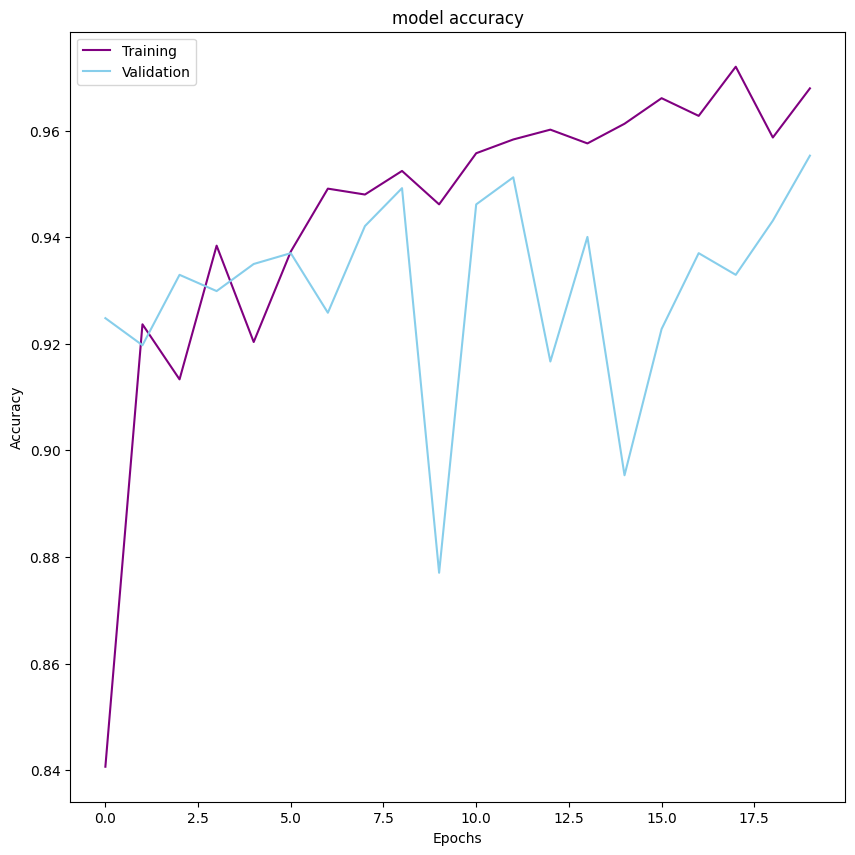

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.plot(history.history['accuracy'],color='purple')
plt.plot(history.history['val_accuracy'],color='skyblue')
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["Training","Validation"])
plt.show()

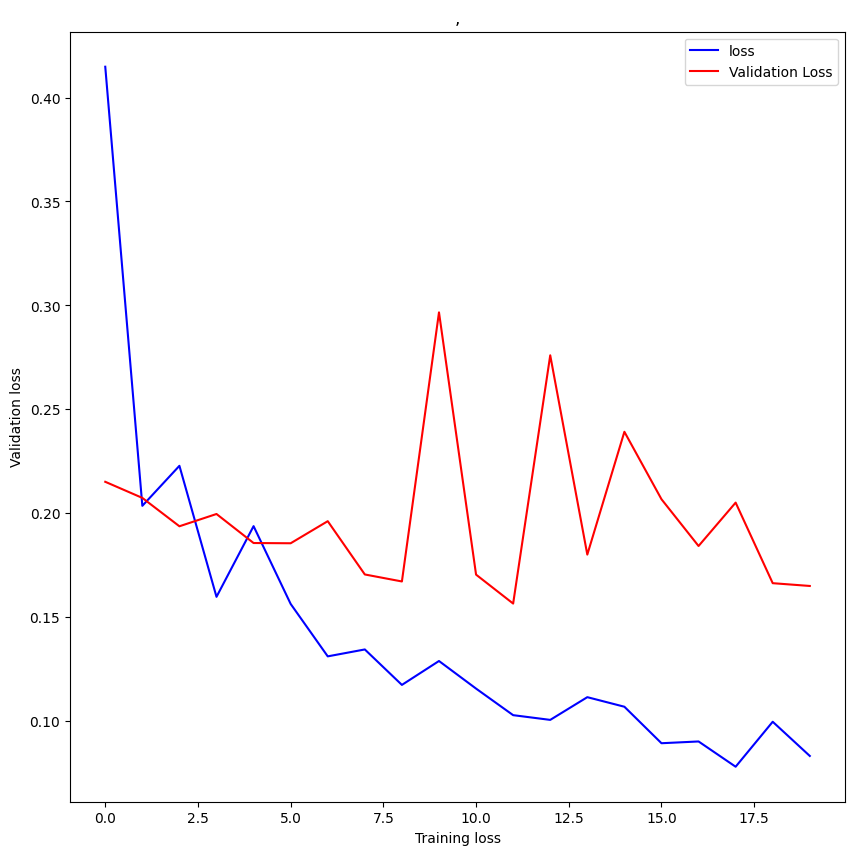

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.plot(history.history['loss'],color='blue')
plt.plot(history.history['val_loss'],color='red')
plt.title(",")
plt.xlabel("Training loss")
plt.ylabel("Validation loss")
plt.legend(["loss","Validation Loss"])
plt.show()